# 2D Optics Tutorial: Interband absorption spectrum of a GaAs cylindrical quantum wire

**Authors: Naoki Mitsui (simulation), Brandon Loke (write-up and visualisations)**

This tutorial calculates the optical spectrum of a GaAs cylindrical quantum wire with infinite barriers.


In [1]:
import nextnanopy as nn
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib
import re
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Initialise the filepaths

We need both kp8 and single band calculations to plot the figures. The variables have been changed in their respective inputfiles.

In [2]:
inputpath_kp8 = r'D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_kp8.in'
inputfile_kp8 = nn.InputFile(inputpath_kp8)
inputpath_single = r'D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_singleband.in'
inputfile_single = nn.InputFile(inputpath_single)

In [3]:
### These are the files we are interested in

datafiles = {
    r'bias_00000' : ['bandedge_Gamma.vtr', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'],
    r'bias_00000\Quantum' : ['amplitudes_quantum_region_Gamma_00000.vtr', 'energy_spectrum_quantum_region_Gamma_00000.dat', 'energy_spectrum_quantum_region_kp8_00000.dat'],
    r'bias_00000\Optics' : ['absorption_quantum_region_kp8_z_eV.dat', 'absorption_quantum_region_kp8_x_eV.dat', 'absorption_quantum_region_kp8_y_eV.dat', 'occupation_disp_quantum_region_kp8_16.dat', 'occupation_disp_quantum_region_kp8_1.dat', 'occupation_disp_quantum_region_kp8_17.dat'],
}

datafiles_single = {
    r'bias_00000' : ['bandedge_Gamma.vtr', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'],
    r'bias_00000\Quantum' : ['amplitudes_quantum_region_Gamma_00000.vtr', 'energy_spectrum_quantum_region_Gamma_00000.dat'],
}

In [4]:
def remove_extension(filename):
    return re.match(r'([^.]+)',filename).group(0)

def get_extension(filename):
    return '.'+ re.search(r'\.(.*)',filename).group(1)

def get_filename_no_extension(input_file):
    file = re.search(r'[^\\]*$', input_file.fullpath).group(0)
    return remove_extension(file)

def get_filename_extension(input_file):
    file = re.search(r'[^\\]*$', input_file.fullpath).group(0)
    return get_extension(file)

In [5]:
def execute_input_file(input_file, software, biases, datafiles):
    software = 'nextnano++'
    d = {}
    filename_no_extension = get_filename_no_extension(input_file)
    FileExtension = get_filename_extension(input_file)
    
    output_folder = nn.config.config[software]['outputdirectory']
    input_file.execute()
    
    for bias in biases:
            d[bias] = {}
            
            for k,v in datafiles.items():
                temp_key = re.search(r'([^\\]+$)', k).group(0)
                if 'bias' in temp_key:
                    d[bias] = {}
                
                    for dat in v:
                        dat = dat.replace('00000', bias)
                        foldername = get_filename_no_extension(input_file)
                        p = os.path.join(output_folder, fr'{foldername}' + fr'\{k}' + fr'\{dat}')
                        data = nn.DataFile(p, product = software)
                        d[bias][dat] = data
                else:
                    d[bias][temp_key] = {}
                
                    for dat in v:
                        dat = dat.replace('00000', bias)
                        p = os.path.join(output_folder, fr'{foldername}' + fr'\{k}' + fr'\{dat}')
                        data = nn.DataFile(p, product = software)
                        d[bias][temp_key][dat] = data
    return d

In [6]:
inputfile_kp8.product

'nextnano++'

In [7]:
kp8data = execute_input_file(inputfile_kp8, inputfile_kp8.product, ['00000'], datafiles)

STARTING...
Starting execution as:
C:\Program Files\nextnano\2021_12_24\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\brandon.loke\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2021_12_24\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8 --noautooutdir D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_kp8.in 

nextnano++ (1.9.3 - 2021.122001) Jan 25 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, please contact
nex

   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.403227283) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.460831181) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.518435079) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.576038976) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:      

   E_p - intraband: 27 34 1.56326953
   E_p - intraband: 27 35 1.25034313
   E_p - intraband: 27 36 1.0153599
   E_p - intraband: 28 33 1.56326642
   E_p - intraband: 28 34 1.63787174
   E_p - intraband: 28 35 1.01536267
   E_p - intraband: 28 36 1.25035312
   E_p - intraband: 29 31 2.87412637
   E_p - intraband: 30 32 2.8741263


Optics diagnostic output - bulk operator:
z ((0,0),(0,0),(1,0)):
+k3*S+S*k3	0      	+k2*B	+k1*B	+iP	0      	0      	0      	
0      	+k3*S+S*k3	0      	0      	0      	+k2*B	+k1*B	+iP	
+B*k2	0      	+k3*m0+m0*k3+k3*M+M*k3	0      	-k1*M+M*k1+k1*NP+NM*k1	0      	0      	0      	
+B*k1	0      	0      	+k3*m0+m0*k3+k3*M+M*k3	-k2*M+M*k2+k2*NP+NM*k2	0      	0      	0      	
-iP	0      	+k1*M-M*k1+NP*k1+k1*NM	+k2*M-M*k2+NP*k2+k2*NM	+k3*m0+m0*k3+k3*L+L*k3	0      	0      	0      	
0      	+B*k2	0      	0      	0      	+k3*m0+m0*k3+k3*M+M*k3	0      	-k1*M+M*k1+k1*NP+NM*k1	
0      	+B*k1	0      	0      	0      	0      	+k3*m0+m0*k3+k3*M+M*k3	-k2*M+M*k2+k2*NP+NM*k2	
0   

   E_p - intraband: 21 38 2.31668608
   E_p - intraband: 21 49 2.19176267
   E_p - intraband: 21 58 1.50298335
   E_p - intraband: 22 36 1.29805411
   E_p - intraband: 22 37 1.11767265
   E_p - intraband: 23 48 1.84670349
   E_p - intraband: 24 47 2.32783425
   E_p - intraband: 24 50 1.44803639
   E_p - intraband: 24 57 1.07510701
   E_p - intraband: 25 33 6.08926756
   E_p - intraband: 25 36 2.15116596
   E_p - intraband: 25 46 1.27167613
   E_p - intraband: 25 47 1.6145074
   E_p - intraband: 26 34 3.3480863
   E_p - intraband: 27 35 4.0918571
   E_p - intraband: 28 31 1.0237179
   E_p - intraband: 28 33 1.51546309
   E_p - intraband: 28 36 3.12278182
   E_p - intraband: 28 37 3.26320217
   E_p - intraband: 28 40 3.19976469
   E_p - intraband: 29 32 13.7978802
   E_p - intraband: 29 38 1.23340956
   E_p - intraband: 30 31 3.55401141

   E_p - intraband: 1 35 4.21772562
   E_p - intraband: 2 33 1.27691154
   E_p - intraband: 4 34 4.78769819
   E_p - intraband: 4 39 1.71738478
   E_p -

   E_p - intraband: 9 41 1.24413208
   E_p - intraband: 9 49 1.18533042
   E_p - intraband: 10 47 2.39085037
   E_p - intraband: 11 36 1.06914197
   E_p - intraband: 11 42 1.61674451
   E_p - intraband: 11 50 1.3821024
   E_p - intraband: 13 40 1.11743538
   E_p - intraband: 13 50 1.05454059
   E_p - intraband: 14 34 1.04311966
   E_p - intraband: 16 45 1.19884981
   E_p - intraband: 16 49 1.86096205
   E_p - intraband: 17 40 1.41816964
   E_p - intraband: 18 58 5.31014575
   E_p - intraband: 19 51 1.34763486
   E_p - intraband: 20 57 5.30133085
   E_p - intraband: 21 48 1.96314935
   E_p - intraband: 21 49 2.02308225
   E_p - intraband: 22 47 2.7266602
   E_p - intraband: 23 35 1.59260963
   E_p - intraband: 23 39 1.9910794
   E_p - intraband: 24 33 1.47339494
   E_p - intraband: 24 37 4.26201793
   E_p - intraband: 24 50 1.9680591
   E_p - intraband: 25 33 3.23626718
   E_p - intraband: 26 34 6.51825434
   E_p - intraband: 26 35 1.92164451
   E_p - intraband: 26 48 1.61609706
   E_p 

   E_p - intraband: 23 39 1.87560887
   E_p - intraband: 24 33 1.39383361
   E_p - intraband: 24 37 4.80280993
   E_p - intraband: 24 50 1.30426064
   E_p - intraband: 25 33 3.14252387
   E_p - intraband: 26 34 6.89865438
   E_p - intraband: 26 35 1.08604443
   E_p - intraband: 26 48 1.67883956
   E_p - intraband: 27 34 1.01237743
   E_p - intraband: 27 35 7.46262708
   E_p - intraband: 27 38 2.55211711
   E_p - intraband: 28 36 3.32958625
   E_p - intraband: 28 37 1.02047625
   E_p - intraband: 29 32 4.03158265
   E_p - intraband: 30 31 13.0901862

   E_p - intraband: 25 41 1.5252301
   E_p - intraband: 26 42 1.52671642
   E_p - intraband: 29 33 1.53336574
   E_p - intraband: 30 34 1.53307237

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.766131839) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.37633967
   E_p - intraband: 1 35 1.1

   E_p - intraband: 19 38 1.25651486
   E_p - intraband: 20 37 1.25660894
   E_p - intraband: 23 36 1.13357509
   E_p - intraband: 24 35 1.13380794
   E_p - intraband: 25 39 1.76813139
   E_p - intraband: 26 40 1.76662083
   E_p - intraband: 27 31 1.10240398
   E_p - intraband: 28 32 1.10237926
   E_p - intraband: 29 33 2.00736995
   E_p - intraband: 30 34 2.00708969

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.656684433) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.59229312
   E_p - intraband: 1 35 1.76380265
   E_p - intraband: 2 36 4.25079646
   E_p - intraband: 2 37 1.35367746
   E_p - intraband: 3 38 1.54897486
   E_p - intraband: 4 33 5.82081638
   E_p - intraband: 4 36 1.10802674
   E_p - intraband: 4 37 1.08726842
   E_p - intraband: 5 31 1.74874265
   E_p - intraband: 5 40 1.11600963
   E_p - intraband: 6 32 2.202658
   

   E_p - intraband: 5 34 2.27098743
   E_p - intraband: 6 33 2.27121161
   E_p - intraband: 11 32 1.52445007
   E_p - intraband: 12 31 1.52427562
   E_p - intraband: 21 37 1.79826177
   E_p - intraband: 22 38 1.79304596
   E_p - intraband: 23 36 1.84532947
   E_p - intraband: 23 41 1.56171457
   E_p - intraband: 24 35 1.84602266
   E_p - intraband: 24 42 1.5611263
   E_p - intraband: 25 39 2.71040352
   E_p - intraband: 26 40 2.71216113
   E_p - intraband: 27 31 1.89131463
   E_p - intraband: 28 32 1.89120328
   E_p - intraband: 29 33 2.52859744
   E_p - intraband: 30 34 2.52832081

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.547237028) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.581576
   E_p - intraband: 1 35 2.47628719
   E_p - intraband: 2 36 3.8891083
   E_p - intraband: 2 37 1.68810301
   E_p - intraband: 3 38 1.53030718
 

   E_p - intraband: 24 33 1.19916924
   E_p - intraband: 24 37 4.70768944
   E_p - intraband: 25 33 2.97537944
   E_p - intraband: 26 34 5.78405892
   E_p - intraband: 26 38 1.45430671
   E_p - intraband: 26 48 1.76446364
   E_p - intraband: 27 32 1.84450521
   E_p - intraband: 27 35 7.10405705
   E_p - intraband: 28 33 1.50077852
   E_p - intraband: 28 36 2.13463434
   E_p - intraband: 29 32 4.79024129
   E_p - intraband: 30 31 11.1811576

   E_p - intraband: 1 36 2.68343663
   E_p - intraband: 2 35 2.68250246
   E_p - intraband: 3 36 1.52661165
   E_p - intraband: 3 40 2.74344812
   E_p - intraband: 4 35 1.52661022
   E_p - intraband: 4 39 2.74214618
   E_p - intraband: 5 34 2.27610315
   E_p - intraband: 6 33 2.27259927
   E_p - intraband: 17 32 1.20299801
   E_p - intraband: 18 31 1.2018838
   E_p - intraband: 21 37 2.46061014
   E_p - intraband: 22 38 2.45825798
   E_p - intraband: 23 36 2.63962547
   E_p - intraband: 23 41 2.01934595
   E_p - intraband: 24 35 2.64112811
   E_p - 

   E_p - intraband: 29 32 10.6608794
   E_p - intraband: 30 31 4.8489265

   E_p - intraband: 1 35 3.75754626
   E_p - intraband: 1 38 1.74198126
   E_p - intraband: 2 33 1.93837775
   E_p - intraband: 2 36 3.83957358
   E_p - intraband: 3 34 5.30799171
   E_p - intraband: 3 35 1.31350549
   E_p - intraband: 4 33 1.38307912
   E_p - intraband: 4 37 1.43564888
   E_p - intraband: 6 47 1.4790228
   E_p - intraband: 7 50 1.05223531
   E_p - intraband: 9 36 1.71418492
   E_p - intraband: 9 51 1.18231006
   E_p - intraband: 10 58 2.60914783
   E_p - intraband: 11 32 1.24197359
   E_p - intraband: 12 36 1.28737607
   E_p - intraband: 12 57 3.03980214
   E_p - intraband: 13 35 1.02055938
   E_p - intraband: 13 58 2.76383666
   E_p - intraband: 14 31 1.22359383
   E_p - intraband: 14 57 1.44202072
   E_p - intraband: 15 47 3.17103396
   E_p - intraband: 15 57 1.54431217
   E_p - intraband: 16 49 2.60692229
   E_p - intraband: 17 33 1.09450629
   E_p - intraband: 17 46 1.13095045
   E_p - intra

      
   E_p - intraband: 1 35 4.95195031
   E_p - intraband: 2 36 3.69665718
   E_p - intraband: 2 37 1.53825726
   E_p - intraband: 3 34 1.5640694
   E_p - intraband: 3 38 1.14830679
   E_p - intraband: 4 33 4.06536516
   E_p - intraband: 4 36 1.08072399
   E_p - intraband: 5 48 1.34803217
   E_p - intraband: 6 33 1.18692577
   E_p - intraband: 9 57 3.43778443
   E_p - intraband: 10 52 1.86080457
   E_p - intraband: 11 58 4.48791927
   E_p - intraband: 12 57 1.78919653
   E_p - intraband: 13 35 1.27387691
   E_p - intraband: 13 49 2.04214754
   E_p - intraband: 14 47 1.28620818
   E_p - intraband: 15 50 2.16217526
   E_p - intraband: 16 48 3.66619905
   E_p - intraband: 16 58 1.0335324
   E_p - intraband: 17 33 1.99649748
   E_p - intraband: 17 44 1.29067053
   E_p - intraband: 18 34 1.89262205
   E_p - intraband: 19 32 1.45739928
   E_p - intraband: 19 35 1.11166445
   E_p - intraband: 19 38 1.6198436
   E_p - intraband: 19 39 1.21765208
   E_p - intraband: 20 31 2.34328695
   E_p 

   E_p - intraband: 6 39 2.72228066
   E_p - intraband: 7 36 1.56303932
   E_p - intraband: 8 35 1.5667743
   E_p - intraband: 13 49 1.11882987
   E_p - intraband: 14 50 1.11711383
   E_p - intraband: 15 34 1.64662651
   E_p - intraband: 16 33 1.64019782
   E_p - intraband: 17 34 1.89699331
   E_p - intraband: 17 39 2.82547607
   E_p - intraband: 18 33 1.89437507
   E_p - intraband: 18 40 2.8224618
   E_p - intraband: 19 41 1.38363238
   E_p - intraband: 20 42 1.38565822
   E_p - intraband: 21 38 2.04983395
   E_p - intraband: 21 42 1.4655343
   E_p - intraband: 22 37 2.04535163
   E_p - intraband: 22 41 1.46789512
   E_p - intraband: 23 34 1.03270397
   E_p - intraband: 23 38 1.30226555
   E_p - intraband: 23 39 1.13365899
   E_p - intraband: 23 43 1.01499039
   E_p - intraband: 24 33 1.03037317
   E_p - intraband: 24 37 1.30137327
   E_p - intraband: 24 40 1.13660948
   E_p - intraband: 24 44 1.00977263
   E_p - intraband: 25 31 2.45899285
   E_p - intraband: 25 36 4.38903817
   E_p 

   E_p - intraband: 8 37 1.20085613
   E_p - intraband: 8 57 1.4788904
   E_p - intraband: 9 36 1.62427009
   E_p - intraband: 9 51 1.51809642
   E_p - intraband: 10 35 1.01059134
   E_p - intraband: 10 58 4.59212563
   E_p - intraband: 11 52 1.31000645
   E_p - intraband: 12 57 3.40229792
   E_p - intraband: 13 36 2.04433003
   E_p - intraband: 13 47 1.23474119
   E_p - intraband: 13 50 1.29836721
   E_p - intraband: 14 34 1.20371115
   E_p - intraband: 14 35 2.36288263
   E_p - intraband: 14 43 1.83608892
   E_p - intraband: 15 48 1.67503243
   E_p - intraband: 15 49 2.10195811
   E_p - intraband: 16 47 3.16493058
   E_p - intraband: 17 33 1.76533593
   E_p - intraband: 17 45 1.07596621
   E_p - intraband: 17 50 1.48930026
   E_p - intraband: 18 35 2.70214871
   E_p - intraband: 18 48 1.08146197
   E_p - intraband: 18 49 1.59144163
   E_p - intraband: 19 32 1.03156653
   E_p - intraband: 19 38 2.334514
   E_p - intraband: 19 42 2.31600095
   E_p - intraband: 20 37 3.47923297
   E_p -


   Computing approx. (subspace) multi-band states for k = (0,0,0.0547237028) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 1.40965162
   E_p - intraband: 2 33 1.72986686
   E_p - intraband: 3 34 2.67664377
   E_p - intraband: 3 35 1.00257991
   E_p - intraband: 4 33 2.40664349
   E_p - intraband: 5 33 2.60376973
   E_p - intraband: 6 34 1.076374
   E_p - intraband: 7 58 1.98658732
   E_p - intraband: 8 33 1.11101734
   E_p - intraband: 9 36 1.65725873
   E_p - intraband: 9 57 4.4184252
   E_p - intraband: 10 35 2.0367781
   E_p - intraband: 10 52 1.01570607
   E_p - intraband: 10 58 1.304346
   E_p - intraband: 11 58 1.73841684
   E_p - intraband: 12 37 1.02655585
   E_p - intraband: 12 51 1.16875995
   E_p - intraband: 13 36 4.32037881
   E_p - intraband: 13 44 1.4804307
   E_p - intraband: 14 35 3.40639207
   E_p - intraband: 14 48 1.06205682
   E_p - i

   E_p - intraband: 24 42 1.59509204
   E_p - intraband: 24 48 1.09689975
   E_p - intraband: 25 32 2.44174816
   E_p - intraband: 25 35 1.86751529
   E_p - intraband: 26 31 6.99474142
   E_p - intraband: 26 33 3.90134556
   E_p - intraband: 27 32 5.65739686
   E_p - intraband: 27 34 1.00670051
   E_p - intraband: 27 35 1.92366131
   E_p - intraband: 28 31 2.82265091
   E_p - intraband: 28 33 1.61775886
   E_p - intraband: 29 31 2.69548613
   E_p - intraband: 30 32 2.97459478
   E_p - intraband: 30 35 1.3858058

   E_p - intraband: 1 33 2.50903223
   E_p - intraband: 2 34 2.54195949
   E_p - intraband: 3 34 1.20341857
   E_p - intraband: 4 33 1.18941361
   E_p - intraband: 7 40 3.9874863
   E_p - intraband: 8 39 3.98703032
   E_p - intraband: 11 40 1.95754535
   E_p - intraband: 12 39 1.96031286
   E_p - intraband: 13 39 1.58944789
   E_p - intraband: 13 49 1.5704681
   E_p - intraband: 14 40 1.58808731
   E_p - intraband: 14 50 1.57266166
   E_p - intraband: 17 35 2.79313771
   E_p - 

   E_p - intraband: 1 35 3.34903254
   E_p - intraband: 1 38 1.36910365
   E_p - intraband: 2 36 5.39262577
   E_p - intraband: 3 34 1.12261218
   E_p - intraband: 3 35 1.05430712
   E_p - intraband: 5 34 1.55366685
   E_p - intraband: 6 33 1.13126082
   E_p - intraband: 7 34 3.26804093
   E_p - intraband: 8 33 1.01839637
   E_p - intraband: 9 51 1.82869984
   E_p - intraband: 10 58 3.62014087
   E_p - intraband: 11 52 1.03303367
   E_p - intraband: 11 58 1.74471658
   E_p - intraband: 12 57 4.4637545
   E_p - intraband: 13 45 1.11768938
   E_p - intraband: 13 50 2.50952561
   E_p - intraband: 14 34 1.52270427
   E_p - intraband: 14 43 1.46547707
   E_p - intraband: 14 48 1.16921559
   E_p - intraband: 14 49 1.38658924
   E_p - intraband: 15 47 3.24626555
   E_p - intraband: 16 46 1.15683572
   E_p - intraband: 16 48 1.30132567
   E_p - intraband: 16 49 1.41051694
   E_p - intraband: 17 33 2.51804921
   E_p - intraband: 18 34 1.93157021
   E_p - intraband: 18 35 1.18222971
   E_p - int

   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 1.51847378
   E_p - intraband: 1 35 4.38335068
   E_p - intraband: 2 36 3.76927133
   E_p - intraband: 2 37 1.66254637
   E_p - intraband: 3 34 1.63459161
   E_p - intraband: 3 38 1.38059084
   E_p - intraband: 4 33 5.09824441
   E_p - intraband: 4 36 1.1441648
   E_p - intraband: 5 48 1.39939875
   E_p - intraband: 9 57 3.38436175
   E_p - intraband: 10 52 1.7864598
   E_p - intraband: 11 35 1.07426421
   E_p - intraband: 11 58 4.33463694
   E_p - intraband: 12 57 1.09736783
   E_p - intraband: 13 32 1.40668154
   E_p - intraband: 13 35 1.25298067
   E_p - intraband: 14 31 1.11768463
   E_p - intraband: 15 50 2.5744773
   E_p - intraband: 16 48 3.5166516
   E_p - intraband: 16 58 1.25195384
   E_p - intraband: 17 33 1.68208917
   E_p - intraband: 17 46 1.69275496
   E_p - intraband: 17 47 1.50379398
   E_p - intraban

   E_p - intraband: 14 31 1.22359507
   E_p - intraband: 14 57 1.44201044
   E_p - intraband: 15 47 3.1709762
   E_p - intraband: 15 57 1.54431153
   E_p - intraband: 16 49 2.60681057
   E_p - intraband: 17 33 1.09450659
   E_p - intraband: 17 46 1.13094903
   E_p - intraband: 17 50 2.17433211
   E_p - intraband: 18 34 1.35979854
   E_p - intraband: 18 45 2.00205158
   E_p - intraband: 18 48 2.09280931
   E_p - intraband: 19 31 3.1240044
   E_p - intraband: 19 41 2.65181647
   E_p - intraband: 20 38 1.87954235
   E_p - intraband: 20 58 1.05513583
   E_p - intraband: 21 37 2.11609359
   E_p - intraband: 21 40 1.03925306
   E_p - intraband: 22 32 2.33954232
   E_p - intraband: 22 42 2.75251453
   E_p - intraband: 22 49 1.0007529
   E_p - intraband: 23 33 2.43554281
   E_p - intraband: 24 34 4.69689834
   E_p - intraband: 24 38 1.16900742
   E_p - intraband: 24 48 1.80541907
   E_p - intraband: 25 42 1.09454863
   E_p - intraband: 26 33 1.9157312
   E_p - intraband: 26 37 3.37114983
   E_

   E_p - intraband: 16 50 1.66257631
   E_p - intraband: 17 31 1.05399717
   E_p - intraband: 17 46 2.36502445
   E_p - intraband: 17 47 1.76462298
   E_p - intraband: 18 34 1.23340886
   E_p - intraband: 18 49 1.94112311
   E_p - intraband: 19 47 1.27231373
   E_p - intraband: 19 50 2.31768572
   E_p - intraband: 19 57 1.00140321
   E_p - intraband: 20 45 1.47658501
   E_p - intraband: 20 48 1.95420483
   E_p - intraband: 20 49 1.16265871
   E_p - intraband: 21 42 3.08528528
   E_p - intraband: 22 31 1.4675141
   E_p - intraband: 22 40 1.64046317
   E_p - intraband: 22 41 1.67004002
   E_p - intraband: 23 34 1.19893114
   E_p - intraband: 23 38 4.70689466
   E_p - intraband: 24 41 1.95764774
   E_p - intraband: 25 33 5.78243176
   E_p - intraband: 25 37 1.45410552
   E_p - intraband: 25 47 1.76800465
   E_p - intraband: 26 34 2.97854642
   E_p - intraband: 27 34 1.49477742
   E_p - intraband: 27 35 2.14043179
   E_p - intraband: 28 31 1.84387757
   E_p - intraband: 28 36 7.10997166
  

   E_p - intraband: 30 34 2.79840886

   Computing approx. (subspace) multi-band states for k = (0,0,0.60196073) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.62020811
   E_p - intraband: 1 35 2.10812315
   E_p - intraband: 2 36 4.04418198
   E_p - intraband: 2 37 1.55293625
   E_p - intraband: 3 38 1.54610787
   E_p - intraband: 4 33 5.73681065
   E_p - intraband: 4 36 1.29799539
   E_p - intraband: 5 31 1.69052017
   E_p - intraband: 5 36 1.04448514
   E_p - intraband: 5 40 1.01869328
   E_p - intraband: 6 32 2.14940178
   E_p - intraband: 6 35 3.87298995
   E_p - intraband: 7 48 1.79475912
   E_p - intraband: 11 31 1.01143005
   E_p - intraband: 11 37 1.02473447
   E_p - intraband: 12 32 1.56465545
   E_p - intraband: 13 57 2.18086254
   E_p - intraband: 14 54 1.22683857
   E_p - intraband: 15 58 5.17170399
   E_p - intraband: 16 52 1.21100107
   E_p 

   E_p - intraband: 19 38 1.55180141
   E_p - intraband: 20 37 1.55545782
   E_p - intraband: 23 36 1.47486452
   E_p - intraband: 23 41 1.22340964
   E_p - intraband: 24 35 1.47529479
   E_p - intraband: 24 42 1.22281438
   E_p - intraband: 25 39 2.42225198
   E_p - intraband: 26 40 2.42372646
   E_p - intraband: 27 31 1.45092856
   E_p - intraband: 28 32 1.45086083
   E_p - intraband: 29 33 2.26325864
   E_p - intraband: 30 34 2.26298215

   Computing approx. (subspace) multi-band states for k = (0,0,0.711408136) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.50758077
   E_p - intraband: 1 35 1.43798284
   E_p - intraband: 2 36 4.49105055
   E_p - intraband: 2 37 1.09555943
   E_p - intraband: 2 40 1.13217178
   E_p - intraband: 3 38 1.53664741
   E_p - intraband: 4 33 5.87221102
   E_p - intraband: 4 37 1.33020183
   E_p - intraband: 5 31 1.72769838
  

   E_p - intraband: 25 41 1.34411162
   E_p - intraband: 26 42 1.34851527
   E_p - intraband: 29 33 1.76365286
   E_p - intraband: 30 34 1.76336839

   Computing approx. (subspace) multi-band states for k = (0,0,0.820855541) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.20914418
   E_p - intraband: 2 36 4.95170662
   E_p - intraband: 3 38 1.4613751
   E_p - intraband: 4 33 5.81994919
   E_p - intraband: 4 37 1.79910405
   E_p - intraband: 5 31 1.56453312
   E_p - intraband: 5 40 1.49076798
   E_p - intraband: 6 32 2.27046942
   E_p - intraband: 6 35 4.86646529
   E_p - intraband: 7 32 2.66650888
   E_p - intraband: 8 31 3.40013835
   E_p - intraband: 9 48 1.98337419
   E_p - intraband: 10 50 1.29023315
   E_p - intraband: 12 49 1.88205944
   E_p - intraband: 13 40 1.00724287
   E_p - intraband: 13 57 1.26820761
   E_p - intraband: 14 41 1.41312313
   E_p

   E_p - intraband: 15 50 1.85276021
   E_p - intraband: 17 57 5.31357999
   E_p - intraband: 18 39 1.41282527
   E_p - intraband: 19 58 5.28769137
   E_p - intraband: 20 52 1.34778108
   E_p - intraband: 21 48 2.72616934
   E_p - intraband: 22 47 1.96231696
   E_p - intraband: 22 50 2.02413122
   E_p - intraband: 23 34 1.47322576
   E_p - intraband: 23 38 4.26205986
   E_p - intraband: 23 49 1.96967522
   E_p - intraband: 24 36 1.59270281
   E_p - intraband: 24 40 1.99206288
   E_p - intraband: 25 33 6.53157352
   E_p - intraband: 25 36 1.90539039
   E_p - intraband: 25 47 1.61757196
   E_p - intraband: 26 34 3.23687637
   E_p - intraband: 27 35 3.80517768
   E_p - intraband: 28 33 1.40783592
   E_p - intraband: 28 36 5.61244961
   E_p - intraband: 28 37 3.87834618
   E_p - intraband: 29 32 13.5522694
   E_p - intraband: 30 31 3.79118382

   E_p - intraband: 1 35 5.07340335
   E_p - intraband: 2 33 1.79544203
   E_p - intraband: 3 34 5.50154398
   E_p - intraband: 3 38 1.85179651
   E

   E_p - intraband: 7 32 4.43920368
   E_p - intraband: 8 31 2.55927502
   E_p - intraband: 9 36 1.48206282
   E_p - intraband: 9 47 1.41877158
   E_p - intraband: 10 42 1.63137781
   E_p - intraband: 11 49 1.4881084
   E_p - intraband: 12 47 1.85605018
   E_p - intraband: 13 37 1.16563139
   E_p - intraband: 13 50 1.8577466
   E_p - intraband: 14 34 1.17267677
   E_p - intraband: 16 49 1.60672427
   E_p - intraband: 17 53 1.02871536
   E_p - intraband: 18 58 5.16828745
   E_p - intraband: 19 51 1.2117731
   E_p - intraband: 20 57 5.12428354
   E_p - intraband: 21 35 1.30078
   E_p - intraband: 21 38 1.11559383
   E_p - intraband: 22 33 1.37391368
   E_p - intraband: 22 37 2.32333279
   E_p - intraband: 22 50 2.21570236
   E_p - intraband: 22 57 1.49432423
   E_p - intraband: 23 48 2.35025041
   E_p - intraband: 23 49 1.42972086
   E_p - intraband: 23 58 1.06808071
   E_p - intraband: 24 47 1.87015907
   E_p - intraband: 25 33 3.34752572
   E_p - intraband: 26 34 6.06200883
   E_p - in

   3 (hole) -> 16 (electron) - reliable to 2.43426336 eV - absorption
   3 (hole) -> 17 (electron) - reliable to 2.5055216 eV - absorption
   3 (hole) -> 18 (electron) - reliable to 2.50768002 eV - absorption
   3 (hole) -> 19 (electron) - reliable to 2.5449244 eV - absorption
   3 (hole) -> 20 (electron) - reliable to 2.55783216 eV - absorption
   3 (hole) -> 21 (electron) - reliable to 2.59214463 eV - absorption
   3 (hole) -> 22 (electron) - reliable to 2.62413239 eV - absorption
   3 (hole) -> 23 (electron) - reliable to 2.64562691 eV - absorption
   3 (hole) -> 24 (electron) - reliable to 2.70900272 eV - absorption
   3 (hole) -> 25 (electron) - reliable to 2.74163139 eV - absorption
   3 (hole) -> 26 (electron) - reliable to 2.75359171 eV - absorption
   3 (hole) -> 27 (electron) - reliable to 2.78193438 eV - absorption
   3 (hole) -> 28 (electron) - reliable to 2.89552769 eV - absorption
   3 (hole) -> 29 (electron) - reliable to 2.90792504 eV - absorption
   3 (hole) -> 30 (ele

   11 (hole) -> 16 (electron) - reliable to 2.23566979 eV - absorption
   11 (hole) -> 17 (electron) - reliable to 2.30692804 eV - absorption
   11 (hole) -> 18 (electron) - reliable to 2.30908646 eV - absorption
   11 (hole) -> 19 (electron) - reliable to 2.34633083 eV - absorption
   11 (hole) -> 20 (electron) - reliable to 2.3592386 eV - absorption
   11 (hole) -> 21 (electron) - reliable to 2.39355107 eV - absorption
   11 (hole) -> 22 (electron) - reliable to 2.42553883 eV - absorption
   11 (hole) -> 23 (electron) - reliable to 2.44703335 eV - absorption
   11 (hole) -> 24 (electron) - reliable to 2.51040916 eV - absorption
   11 (hole) -> 25 (electron) - reliable to 2.54303783 eV - absorption
   11 (hole) -> 26 (electron) - reliable to 2.55499815 eV - absorption
   11 (hole) -> 27 (electron) - reliable to 2.58334082 eV - absorption
   11 (hole) -> 28 (electron) - reliable to 2.69693412 eV - absorption
   11 (hole) -> 29 (electron) - reliable to 2.70933148 eV - absorption
   11 (

   3 (hole) -> 27 (electron) - reliable to 2.78193438 eV - absorption
   3 (hole) -> 28 (electron) - reliable to 2.89552769 eV - absorption
   3 (hole) -> 29 (electron) - reliable to 2.90792504 eV - absorption
   3 (hole) -> 30 (electron) - reliable to 2.9415347 eV - absorption
   4 (hole) -> 16 (electron) - reliable to 2.41698184 eV - absorption
   4 (hole) -> 17 (electron) - reliable to 2.48824008 eV - absorption
   4 (hole) -> 18 (electron) - reliable to 2.49039851 eV - absorption
   4 (hole) -> 19 (electron) - reliable to 2.52764288 eV - absorption
   4 (hole) -> 20 (electron) - reliable to 2.54055065 eV - absorption
   4 (hole) -> 21 (electron) - reliable to 2.57486312 eV - absorption
   4 (hole) -> 22 (electron) - reliable to 2.60685088 eV - absorption
   4 (hole) -> 23 (electron) - reliable to 2.6283454 eV - absorption
   4 (hole) -> 24 (electron) - reliable to 2.69172121 eV - absorption
   4 (hole) -> 25 (electron) - reliable to 2.72434987 eV - absorption
   4 (hole) -> 26 (ele

   11 (hole) -> 27 (electron) - reliable to 2.58334082 eV - absorption
   11 (hole) -> 28 (electron) - reliable to 2.69693412 eV - absorption
   11 (hole) -> 29 (electron) - reliable to 2.70933148 eV - absorption
   11 (hole) -> 30 (electron) - reliable to 2.74294114 eV - absorption
   12 (hole) -> 16 (electron) - reliable to 2.23072788 eV - absorption
   12 (hole) -> 17 (electron) - reliable to 2.30198613 eV - absorption
   12 (hole) -> 18 (electron) - reliable to 2.30414455 eV - absorption
   12 (hole) -> 19 (electron) - reliable to 2.34138892 eV - absorption
   12 (hole) -> 20 (electron) - reliable to 2.35429669 eV - absorption
   12 (hole) -> 21 (electron) - reliable to 2.38860916 eV - absorption
   12 (hole) -> 22 (electron) - reliable to 2.42059692 eV - absorption
   12 (hole) -> 23 (electron) - reliable to 2.44209144 eV - absorption
   12 (hole) -> 24 (electron) - reliable to 2.50546725 eV - absorption
   12 (hole) -> 25 (electron) - reliable to 2.53809591 eV - absorption
   12 

   4 (hole) -> 21 (electron) - reliable to 2.57486312 eV - absorption
   4 (hole) -> 22 (electron) - reliable to 2.60685088 eV - absorption
   4 (hole) -> 23 (electron) - reliable to 2.6283454 eV - absorption
   4 (hole) -> 24 (electron) - reliable to 2.69172121 eV - absorption
   4 (hole) -> 25 (electron) - reliable to 2.72434987 eV - absorption
   4 (hole) -> 26 (electron) - reliable to 2.73631019 eV - absorption
   4 (hole) -> 27 (electron) - reliable to 2.76465286 eV - absorption
   4 (hole) -> 28 (electron) - reliable to 2.87824617 eV - absorption
   4 (hole) -> 29 (electron) - reliable to 2.89064352 eV - absorption
   4 (hole) -> 30 (electron) - reliable to 2.92425319 eV - absorption
   5 (hole) -> 16 (electron) - reliable to 2.30417369 eV - absorption
   5 (hole) -> 17 (electron) - reliable to 2.37543194 eV - absorption
   5 (hole) -> 18 (electron) - reliable to 2.37759036 eV - absorption
   5 (hole) -> 19 (electron) - reliable to 2.41483473 eV - absorption
   5 (hole) -> 20 (el

   12 (hole) -> 22 (electron) - reliable to 2.42059692 eV - absorption
   12 (hole) -> 23 (electron) - reliable to 2.44209144 eV - absorption
   12 (hole) -> 24 (electron) - reliable to 2.50546725 eV - absorption
   12 (hole) -> 25 (electron) - reliable to 2.53809591 eV - absorption
   12 (hole) -> 26 (electron) - reliable to 2.55005623 eV - absorption
   12 (hole) -> 27 (electron) - reliable to 2.57839891 eV - absorption
   12 (hole) -> 28 (electron) - reliable to 2.69199221 eV - absorption
   12 (hole) -> 29 (electron) - reliable to 2.70438956 eV - absorption
   12 (hole) -> 30 (electron) - reliable to 2.73799923 eV - absorption
   13 (hole) -> 16 (electron) - reliable to 2.16921294 eV - absorption
   13 (hole) -> 17 (electron) - reliable to 2.24047119 eV - absorption
   13 (hole) -> 18 (electron) - reliable to 2.24262961 eV - absorption
   13 (hole) -> 19 (electron) - reliable to 2.27987399 eV - absorption
   13 (hole) -> 20 (electron) - reliable to 2.29278175 eV - absorption
   13 

In [8]:
singlebanddata = execute_input_file(inputfile_single, inputfile_single.product, ['00000'], datafiles_single)

STARTING...
Starting execution as:
C:\Program Files\nextnano\2021_12_24\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\brandon.loke\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2021_12_24\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_singleband --noautooutdir D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_singleband.in 

nextnano++ (1.9.3 - 2021.122001) Jan 25 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, plea

## Plotting the bandedge structure

In [9]:
bandedge = kp8data['00000']['bandedge_Gamma.vtr'].variables['bandedge_Gamma'].value

In [10]:
kp8data['00000']['bandedge_Gamma.vtr'].coords['x']

Coord - name: x - unit: a.u. - shape: (160,) - dim: 0

In order to plot 2D figures, we will require the use of <code>[np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)</code>. A short explanation on the usage of <code>np.meshgrid</code> can be found [here](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy).

In [11]:
xx, yy = np.meshgrid(kp8data['00000']['bandedge_Gamma.vtr'].coords['x'].value, kp8data['00000']['bandedge_Gamma.vtr'].coords['y'].value)

Text(0, 0.5, 'y (nm)')

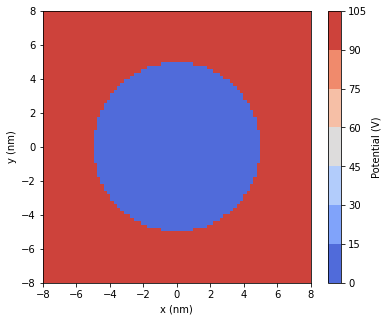

In [12]:
fig, ax = plt.subplots(1, figsize = (6,5))
con = ax.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbar = plt.colorbar(con)
cbar.set_label('Potential (V)')
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')

# plt.savefig('./Images/bandstructure.png', dpi = 2000)

In [13]:
bandedge1D = kp8data['00000']['bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'].variables['Band_Edge'].value
y =  kp8data['00000']['bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'].coords['y'].value

Text(0, 0.5, 'Energy\\ (eV)')

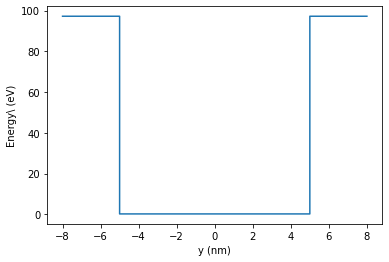

In [14]:
fig, ax = plt.subplots()
ax.plot(y, bandedge1D)
ax.set_xlabel('y (nm)')
ax.set_ylabel(r'Energy\ (eV)')

# plt.savefig('./Images/1dbandedge.png', dpi = 2000)

Combining the two plots into one

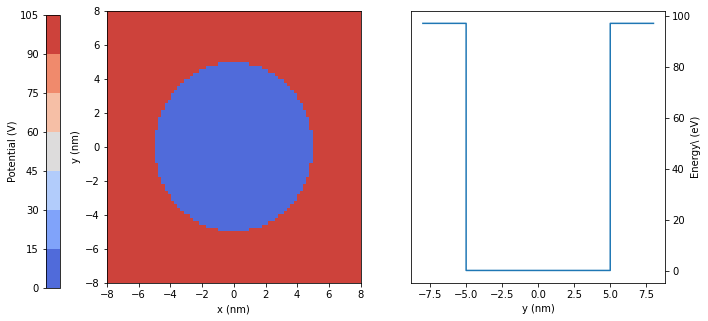

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
con = ax1.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbaxes = fig.add_axes([0.04, 0.11, 0.02, 0.76]) 
cbar = plt.colorbar(con, cax = cbaxes)
cbar.ax.yaxis.set_ticks_position('left')
cbar.set_label('Potential (V)', labelpad = -53)
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')

ax2.plot(y, bandedge1D)
ax2.set_xlabel('y (nm)')
ax2.set_ylabel(r'Energy\ (eV)', loc = 'center', labelpad = -290)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.tick_right()

# plt.savefig('./Images/combinedBandedge.png', dpi = 2000)

## Absorbtion

In [16]:
kp8data['00000']['Optics']['absorption_quantum_region_kp8_x_eV.dat']

DataFile
fullpath: D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8\bias_00000\Optics\absorption_quantum_region_kp8_x_eV.dat
Coordinates: 0 datasets
Variables: 2 datasets
	name: Energy - unit: eV - shape: (30001,)
	name: Absorption - unit: cm^-1 - shape: (30001,)

We want to plot the absorption for each polarisation direction, so we get the data for the x, y and z directions

In [17]:
E = kp8data['00000']['Optics']['absorption_quantum_region_kp8_z_eV.dat'].variables['Energy'].value
aX = kp8data['00000']['Optics']['absorption_quantum_region_kp8_x_eV.dat'].variables['Absorption'].value
aY = kp8data['00000']['Optics']['absorption_quantum_region_kp8_y_eV.dat'].variables['Absorption'].value
aZ = kp8data['00000']['Optics']['absorption_quantum_region_kp8_z_eV.dat'].variables['Absorption'].value

### Getting the peaks of absorption

We can use a <code>SciPy</code> package to find the peaks of the absorption spectrum. This will help us in identifying the eigenenergies for the bands. It is not stricly necessary to find the peaks using <code>SciPy</code>, but it will aid the plotting of graphs.

In [18]:
from scipy.signal import find_peaks

In [19]:
peaks, _ = find_peaks(aY, height = 0)
peaks

array([16751, 17032, 18056, 18106, 18282, 18824, 18957, 19194, 19713,
       20045, 20269, 20593, 21617, 21731, 22128, 22651, 23067, 23165,
       23548, 24107, 25036, 25329, 25585], dtype=int64)

Get the first peak value

In [20]:
aY[peaks][0]

5838.546

Get the highest peak

In [21]:
np.max(aY[peaks])

6600.994

Get the corresponding index


In [22]:
np.where(aY == np.max(aY[peaks]))

(array([20593], dtype=int64),)

In [120]:
E[peaks]

array([1.6751, 1.7032, 1.8056, 1.8106, 1.8282, 1.8824, 1.8957, 1.9194,
       1.9713, 2.0045, 2.0269, 2.0593, 2.1617, 2.1731, 2.2128, 2.2651,
       2.3067, 2.3165, 2.3548, 2.4107, 2.5036, 2.5329, 2.5585])

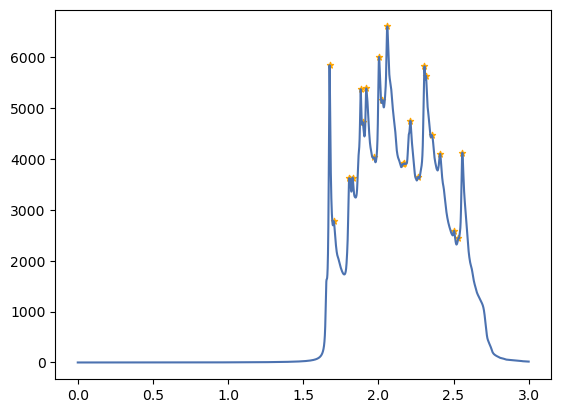

In [129]:
fig,ax = plt.subplots()
ax.plot(E, aX)
ax.scatter(E[peaks], aX[peaks], marker = '*',s = 20,color = 'orange')

### Plotting the absorption

We plot the polarisation for all directions onto a single graph, and then we identify the peaks of interest and find its corresponding energies on the x-axis.

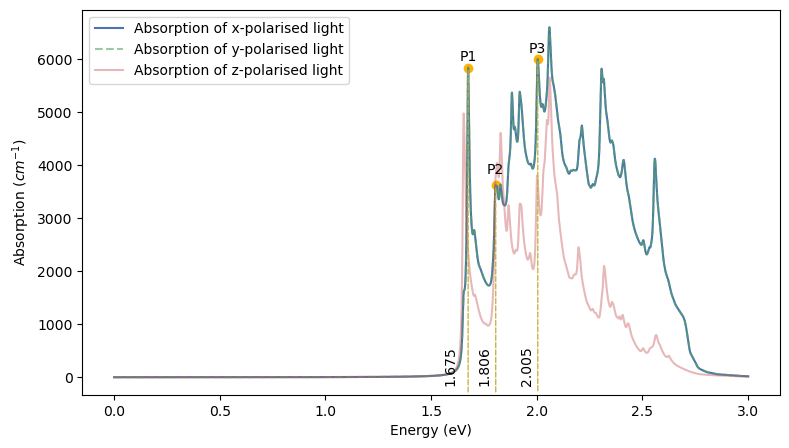

In [131]:
plt.style.use('default')
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(1, figsize = (9,5))

ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'Absorption $(cm ^{-1})$')

##FIRST PEAK
# ax.axvline(E[peaks][0], ymax = 0.85, color = 'r', ls = '--')
# ax.text(E[peaks][0] - 0.03, +150, str(E[peaks][0]), transform = ax.transData, ha='right')
# ax.text(1.5, a[peaks][0] + 200, str(a[peaks][0]), transform = ax.transData)

ax1, = ax.plot(E, aX, alpha = 1)
ax2, = ax.plot(E, aY, '--', alpha = 0.6)
ax3, = ax.plot(E, aZ, alpha = 0.4)


temp = 0
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P1', ha= 'center', va = 'center')
# ax.annotate(text = 'P1', xy = (E[peaks][temp], a[peaks][temp]), xytext = (1.3, 1800), arrowprops = dict(arrowstyle = '<-'))
ax.text(E[peaks][temp]-0.05, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 2
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+300, 'P2', ha= 'center', va=  'center')
# ax.annotate(text = 'P2', xy = (E[peaks][temp], a[peaks][temp]), xytext = (2.3, 4000), arrowprops = dict(arrowstyle = '<-'))
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 9
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P3', ha= 'center', va = 'center')
# ax.annotate(text = 'P3', xy = (E[peaks][temp], a[peaks][temp]), xytext = (2.6, 2000), arrowprops = dict(arrowstyle = '<-'))
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

##Biggest peak
# ax.scatter(E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])], color = 'orange')
# ax.annotate(text = '', xy = (E[peaks][np.argmax(a[peaks])], ax.get_ylim()[0]), xytext = (E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = 'red'))
# ax.text(E[np.where(a == np.max(a[peaks]))]+0.05, np.max(a[peaks]) - 100, str(np.max(a[peaks])),transform = ax.transData)
# ax.text(E[peaks][np.argmax(a[peaks])] - 0.02, -100, str(E[peaks][np.argmax(a[peaks])]), transform = ax.transData, rotation = 90, ha = 'right')


titles = []
l = ['x', 'y', 'z']
for item in l:
    titles.append('Absorption of '+str(item) +'-polarised light')

for title in titles:
    plt.legend([ax1, ax2, ax3], titles)
plt.savefig('./Images/absorption.png', dpi = 2000)

We can identify the transitions that give us the energies in the graph above by analysing the <code>.txt</code> file that outputs the energies and the intensity of these transitions.

In [31]:
import pandas as pd

In [43]:
kp8outputfile = r'D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8\bias_00000'
transitionsdata = os.path.join(kp8outputfile, r'Optics\transitions_quantum_region_kp8_x.txt')
df = pd.read_csv(transitionsdata, delimiter = "\t\t")
df.head()

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
0,1.78801,1,16,0.094832,1.235590e-07
1,1.92504,1,17,2.851040,3.817310e-09
2,1.92587,1,18,0.373608,2.911770e-08
3,2.08454,1,19,0.718649,1.398530e-08
4,2.08653,1,20,0.002669,3.761660e-06


We want to find all transitions that has energies near P1 (1.675 eV). We use [operations on DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) to identify the values of interest.

In [88]:
def highlight(df, val , e):
    for i in df:
        if bool(val - e <= df.loc[i,'Energy[eV]'] <= val +e):
            return 'background: yellow'
        else:
            return ''

In [113]:
energyrange = 0.1
energycenter = 1.675
df1 = df[(df['Energy[eV]'] < (energycenter + energyrange)) & (df['Energy[eV]'] > (energycenter - energyrange))].sort_values(by = 'Energy[eV]').head(10000)
df1

highlight = lambda x : ['background: yellow' if (x.name == 180) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
210,1.651700,15,16,6.572610,0.000000
195,1.664760,14,16,0.805036,0.000000
180,1.674370,13,16,19.902100,0.000000
165,1.689080,12,16,0.023433,0.000001
150,1.701790,11,16,2.426480,0.000000
135,1.705430,10,16,0.318657,0.000000
120,1.726320,9,16,0.021924,0.000001
105,1.731540,8,16,0.282358,0.000000
90,1.744330,7,16,0.020254,0.000001
75,1.748420,6,16,0.103828,0.000000


We observe that the transition at P1 is from the 16th state (lowest conduction band) to the 14th state (2nd highest valence band). This is identified through the high <code>Intensity_k0</code> of $\sim$19 eV

We can conduct a similar analysis for the other peaks.

In [134]:
energycenter = 1.806
df1 = df[(df['Energy[eV]'] < (energycenter + energyrange)) & (df['Energy[eV]'] > (energycenter - energyrange)) ].sort_values(by = 'Energy[eV]').head(10000)
highlight = lambda x : ['background: yellow' if (x.name == 196) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
120,1.726320,9,16,0.021924,0.000001
105,1.731540,8,16,0.282358,0.000000
90,1.744330,7,16,0.020254,0.000001
75,1.748420,6,16,0.103828,0.000000
60,1.756880,5,16,0.018855,0.000001
45,1.761870,4,16,0.000015,0.000767
30,1.779830,3,16,0.001705,0.000007
15,1.780060,2,16,0.029742,0.000000
0,1.788010,1,16,0.094832,0.000000
211,1.788730,15,17,0.109733,0.000000


In [141]:
energycenter = 2.005
df1 = df[(df['Energy[eV]'] < (energycenter + energyrange)) & (df['Energy[eV]'] > (energycenter - energyrange)) & (df['Intensity_k0[eV]'] > 1)].sort_values(by = 'Energy[eV]').head(10000)

highlight = lambda x : ['background: yellow' if (x.name == 139 or x.name == 138) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
16,1.917090,2,17,10.003000,0.000000
1,1.925040,1,17,2.851040,0.000000
153,1.998320,11,19,1.322760,0.000000
154,2.000310,11,20,3.150590,0.000000
138,2.001960,10,19,5.991300,0.000000
139,2.003940,10,20,1.792270,0.000000
78,2.044950,6,19,1.956500,0.000000
155,2.055160,11,21,5.794630,0.000000
48,2.058400,4,19,1.017280,0.000000
140,2.058790,10,21,3.721900,0.000000


The highlighted values best match the peaks observed on the absorption against energy graph.

## Eigenvalues, transition energies and occupations

In [24]:
num = kp8data['00000']['Quantum']['energy_spectrum_quantum_region_kp8_00000.dat'].variables['no.'].value
eigenE = kp8data['00000']['Quantum']['energy_spectrum_quantum_region_kp8_00000.dat'].variables['Energy'].value

In [150]:
eigenE.size

60

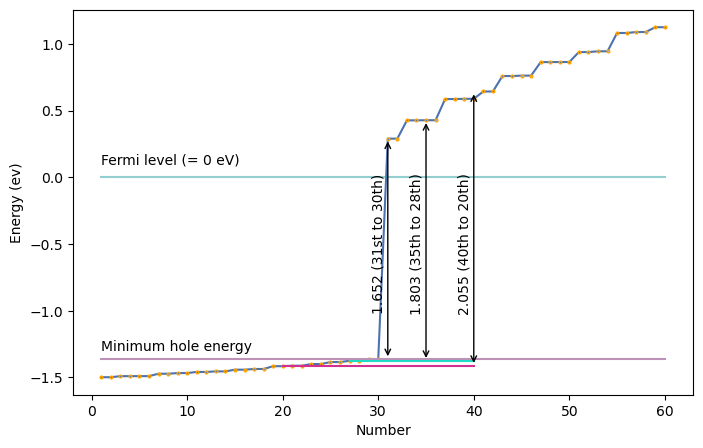

In [182]:
fig, ax = plt.subplots(1, figsize = (8,5))
ax.plot(num, eigenE, '-o', markerfacecolor = 'None', markeredgecolor = 'orange', ms = 2)

#plotting the zero line (fermi level)
zeros = np.zeros(np.size(num))
ax.plot(num, zeros, color = '#299fa3', alpha = 0.5)
ax.text(1, 0.1, 'Fermi level (= 0 eV)')

#plotting the minimum hole energy
minimum = np.zeros(np.size(num)) + eigenE[29]

ax.plot(num, minimum, color = '#bd91b8')
ax.text(1, -1.3, 'Minimum hole energy')

ax.set_xlabel('Number')
ax.set_ylabel('Energy (ev)')

xoffset = 1
ax.annotate(text = '', xy = (31, eigenE[31]), xytext = (31, eigenE[29]), arrowprops = dict(arrowstyle = '<->'))
ax.text(31 - xoffset, -0.5, str(round(eigenE[31] - eigenE[29],3)) + ' (31st to 30th)', rotation = 90, va = 'center', ha = 'center')

ax.annotate(text = '', xy = (35, eigenE[35]), xytext = (35, eigenE[27]), arrowprops = dict(arrowstyle = '<->'))
ax.text(35 - xoffset, -0.5, str(format(round(eigenE[35] - eigenE[27],3),'.3f')) + ' (35th to 28th)', rotation = 90, va = 'center', ha = 'center')
ax.plot([27, 40],[eigenE[27], eigenE[27]], color = '#1fdbc5', alpha = 1)
# ax.scatter([27],[eigenE[27]], s=20, alpha = 0.5,color = 'red')


ax.annotate(text = '', xy = (40, eigenE[40]), xytext = (40, eigenE[20]), arrowprops = dict(arrowstyle = '<->'))
ax.text(40 - xoffset, -0.5, str(round(eigenE[40] - eigenE[20],3)) + ' (40th to 20th)', rotation = 90, va = 'center', ha = 'center')
ax.plot([20, 40],[eigenE[20], eigenE[20]], color = '#d13091', alpha = 1)


plt.savefig('./Images/energy_levels.png', dpi = 2000)

## Occupation

Text(0, 0.5, 'Occupation probability')

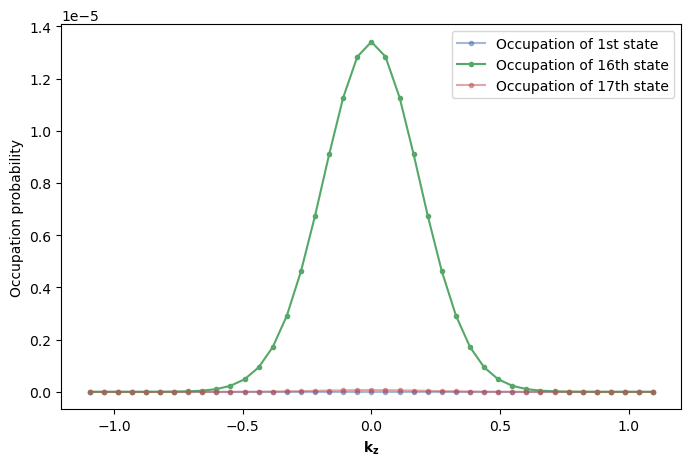

In [26]:
occu1 = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_1.dat'].variables['occupation'].value
occu2 = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_16.dat'].variables['occupation'].value
occu3 = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_17.dat'].variables['occupation'].value
kx = kp8data['00000']['Optics']['occupation_disp_quantum_region_kp8_16.dat'].variables['kx'].value

fig, ax = plt.subplots(1, figsize = (8,5))
markersize = 3
occuplt1,  = ax.plot(kx, occu1, '-o', markersize = markersize, alpha = 0.5)
occuplt2,  = ax.plot(kx, occu2, '-o', markersize = markersize)
occuplt3,  = ax.plot(kx, occu3, '-o', markersize = markersize, alpha = 0.5)

ax.legend([occuplt1, occuplt2, occuplt3], ['Occupation of 1st state', 'Occupation of 16th state', 'Occupation of 17th state'])

# ax.set_title("Occupation probabilities")
ax.set_xlabel(r'$\mathbf{k_z}$')
ax.set_ylabel('Occupation probability')
# plt.savefig('./Images/occupation.png', dpi = 2000)

## Eigenstates

To plot the eigenstates of the single band calculation, we use the variable <code>singlebanddata</code> instead. We want to visualise the eigenstates and wavefunction amplitudes in 3D. For this, we will require an additional package.

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

These files are chosen to find consecutive excited states. Degenerate states are skipped.

In [28]:
psi1 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_1'].value
psi2 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_2'].value
psi3 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_4'].value
psi4 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_6'].value
psi5 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_7'].value
psi6 = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].variables['Psi_9'].value

In [29]:
eigenX = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].coords['x'].value
eigenY = singlebanddata['00000']['Quantum']['amplitudes_quantum_region_Gamma_00000.vtr'].coords['y'].value
XX, YY = np.meshgrid(eigenX, eigenY)

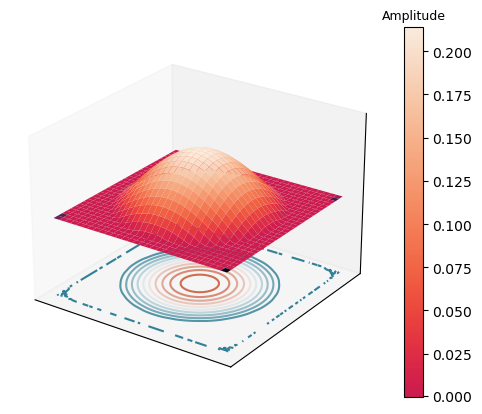

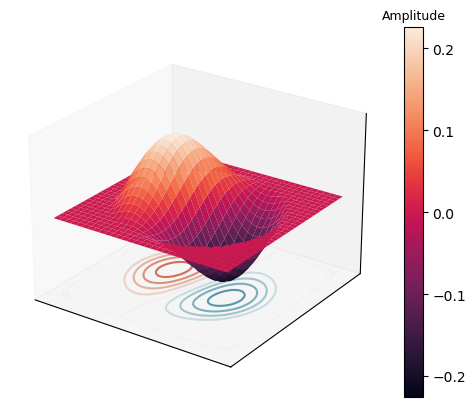

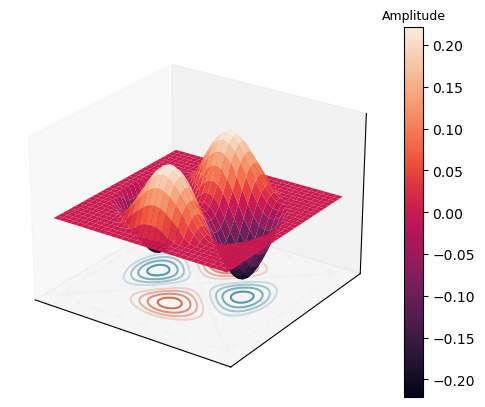

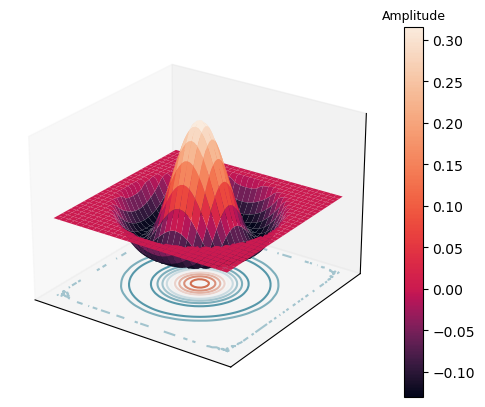

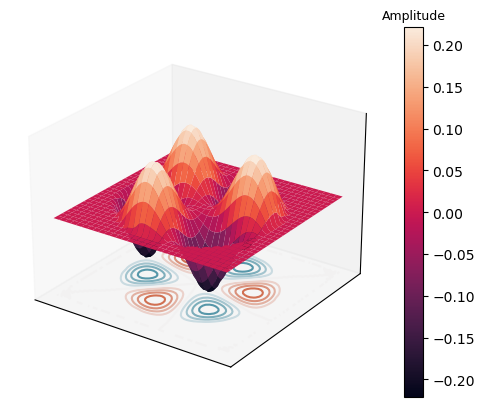

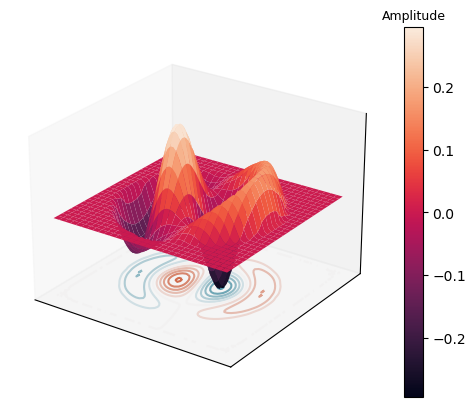

In [30]:
c1 = sns.color_palette("rocket", as_cmap=True)

offset = np.zeros(6) - 0.3
for i in range(1,7):
    divnorm = colors.TwoSlopeNorm(vcenter = 0)
    
    fig, ax = plt.subplots(subplot_kw = {'projection' : '3d'})
    exec(f'psi = psi{i}')
    surf = ax.plot_surface(XX, YY, psi, cmap = c1, norm = divnorm)
    cbar = plt.colorbar(surf)
    cbar.ax.set_title('Amplitude', fontsize = 9)
    ax.tick_params(labelbottom=False, labelleft=False)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.zaxis.set_ticks([])
    ax.view_init(25, 90+35)
    ax.set_zlim(-0.3,0.3)
    ax.contour(XX, YY, psi, 10, zdir = 'z', cmap=sns.diverging_palette(220, 20, s= 85,as_cmap=True), linestyles="solid", offset= offset[i-1])
#     plt.savefig(f'./Images/psi{i}.png', dpi = 2000)